# kaggle playground Binary Prediction of Smoker Status using Bio-Signals competition 프로젝트
### **진행기간** : 2023-10-15~2023-10-31 
### **성과**  
로컬 환경에 wsl2 환경을 구축하여 cuda 사용을 할 수 있게 되었다.  
과적합을 판단하는 방법과 해결방법을 학습했다.  
TensorFlow 함수형 API를 사용하여 피드포워드 네트워크를 구현하는 방법을 학습했다.
정확히 어떤 수식으로 작동하는지 이해하지 못했지만 다양한 경사하강법을 사용해보며 경사하강법의 종류를 학습했다.  


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import csv
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization, Input, Dense, Dropout, concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

2024-04-18 13:08:35.699673: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 13:08:35.699725: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 13:08:35.701212: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-18 13:08:35.844195: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 13:08:37.128956: W tensorflow/compiler/

In [12]:
import os
import tensorflow as tf 
from tensorflow.python.client import device_lib
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [19]:
df = pd.read_csv("train_dataset.csv")
df1 = pd.read_csv("test_dataset.csv")

In [64]:

df_train = df.drop(['age', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'Cholesterol', 'HDL', 'LDL', 'Urine protein', 'AST', 'ALT'], axis= 1)
df_test = df1.drop(['age', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'Cholesterol', 'HDL', 'LDL', 'Urine protein', 'AST', 'ALT'], axis = 1)

In [65]:
df_split_train, df_split_train_ev = train_test_split(df_train, test_size=0.2, random_state=20)

In [66]:
df_split_train_target = df_split_train['smoking']
df_split_train_ev_target = df_split_train_ev['smoking']
df_split_train.drop(['smoking'], axis= 1)
df_split_train_ev.drop(['smoking'], axis = 1)

,height(cm),weight(kg),waist(cm),relaxation,fasting blood sugar,triglyceride,hemoglobin,serum creatinine,Gtp,dental caries
33697,155,50,73.0,82,100,66,14.6,0.7,14,1
23981,165,60,86.5,79,93,105,16.0,1.0,63,0
3883,155,55,75.0,65,102,85,13.7,0.8,12,0
22765,155,55,70.0,66,75,61,13.9,0.6,10,1
15813,155,60,83.2,60,83,92,13.8,0.8,26,0
...,...,...,...,...,...,...,...,...,...,...
21423,170,60,75.0,70,105,84,16.8,1.0,28,0
3304,165,55,69.0,83,86,67,15.3,1.1,28,1
22951,175,70,84.0,85,122,347,16.3,0.8,234,0
9643,180,75,85.2,100,207,171,18.2,0.8,43,1


In [71]:
df_split_train = df_split_train.drop(['smoking'], axis= 1)
df_split_train_ev = df_split_train_ev.drop(['smoking'], axis = 1)

In [ ]:
df_corr_metrix =  df.corr()
plt.figure(figsize = (30, 20))
sns.heatmap(df_corr_metrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [27]:
initializer1 = tf.keras.initializers.HeNormal()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [84]:
def bn_arin_smoke():
    inputs = Input(shape=(10,))
    x = Dense(1024, activation = 'elu', kernel_initializer = initializer1)(inputs)
    x = Dropout(0.5)(x)
    x = Dense(512, activation = 'elu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation = 'elu', kernel_initializer = initializer1)(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation = 'elu')(x)
    x = Dropout(0.2)(x)
    x = Dense(64, activation = 'elu', kernel_initializer = initializer1)(x)
    x = Dropout(0.1)(x)
    x = Dense(32, activation = 'elu')(x)
    x = Dropout(0.1)(x)
    x = Dense(16, activation = 'elu', kernel_initializer = initializer1)(x)
    x = Dropout(0.1)(x)
    x = Dense(8, activation = 'elu')(x)    
    output = Dense(1, activation = 'sigmoid')(x)
    model = Model(inputs = inputs, outputs = output, name = 'arin')
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['binary_accuracy'])
    
    return model
model = bn_arin_smoke()
model.summary()

Model: "arin"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 10)]              0         
                                                                 
 dense_138 (Dense)           (None, 1024)              11264     
                                                                 
 dropout_63 (Dropout)        (None, 1024)              0         
                                                                 
 dense_139 (Dense)           (None, 512)               524800    
                                                                 
 dropout_64 (Dropout)        (None, 512)               0         
                                                                 
 dense_140 (Dense)           (None, 256)               131328    
                                                                 
 dropout_65 (Dropout)        (None, 256)               0      

/home/arin/.local/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [85]:

his = model.fit(df_split_train, df_split_train_target, epochs=100, verbose=2, validation_data=(df_split_train_ev, df_split_train_ev_target), callbacks=[early_stopping])

Epoch 1/100


975/975 - 14s - loss: 2.6069 - binary_accuracy: 0.5971 - val_loss: 0.6878 - val_binary_accuracy: 0.6360 - 14s/epoch - 14ms/step
Epoch 2/100
975/975 - 14s - loss: 0.6676 - binary_accuracy: 0.6394 - val_loss: 0.6775 - val_binary_accuracy: 0.6352 - 14s/epoch - 14ms/step
Epoch 3/100
975/975 - 11s - loss: 0.6468 - binary_accuracy: 0.6498 - val_loss: 0.6506 - val_binary_accuracy: 0.6386 - 11s/epoch - 11ms/step
Epoch 4/100
975/975 - 10s - loss: 0.6402 - binary_accuracy: 0.6544 - val_loss: 0.6468 - val_binary_accuracy: 0.6392 - 10s/epoch - 11ms/step
Epoch 5/100
975/975 - 11s - loss: 0.6355 - binary_accuracy: 0.6623 - val_loss: 0.6899 - val_binary_accuracy: 0.6329 - 11s/epoch - 11ms/step
Epoch 6/100
975/975 - 12s - loss: 0.6190 - binary_accuracy: 0.6696 - val_loss: 0.5997 - val_binary_accuracy: 0.6797 - 12s/epoch - 12ms/step
Epoch 7/100
975/975 - 12s - loss: 0.6128 - binary_accuracy: 0.6721 - val_loss: 0.6328 - val_binary_accuracy: 0.6436 - 12s/epoch - 12ms/step
Epoch 8/100
975/975 - 10s - loss

<Axes: >

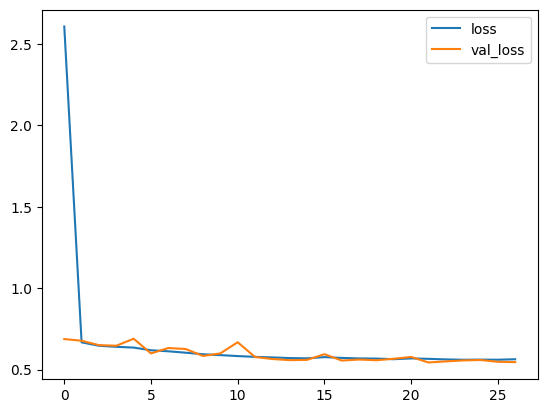

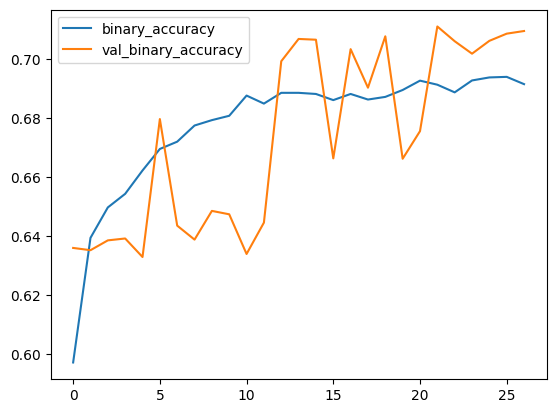

In [86]:
df_his = pd.DataFrame(his.history)
df_his[["loss",  "val_loss"]].plot()
df_his[["binary_accuracy", "val_binary_accuracy"]].plot()


In [ ]:
predictions = rf.predict(test_ds)

In [ ]:
a = []
for i in predictions :
    i = i.tolist()
    if i.index(max(i)) == 2 :
        a.append('H')
    elif i.index(max(i))==1:
        a.append('D')
    elif i.index(max(i))==0:
        a.append('A')